In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from enum import Enum
np.set_printoptions(precision=3, suppress=True)
plt.rcParams["figure.figsize"] = [12, 12]

In [11]:
class Rotation(Enum):
    ROLL=0
    PITCH=1
    YAW=2

In [12]:
class EulerRotation:
    def __init__(self, rotations):
        """
        `rotations` is a list of 2-element tuples where the
        first element is the rotation kind and the second element
        is angle in degrees.
        
        Ex:
        
            [(Rotation.ROLL, 45), (Rotation.YAW, 32), (Rotation.PITCH, 55)]
            
        """
        self._rotations=rotations
        self._rotation_map={Rotation.ROLL : self.roll, Rotation.PITCH : self.pitch, Rotation.YAW : self.yaw}
        
    def roll(self, phi):
        """Returns a rotation matrix along the roll axis"""
        return np.array([[1., 0, 0],
                        [0, np.cos(phi), -np.sin(phi)],
                        [0, np.sin(phi), np.cos(phi)]])
    
    def pitch(self, theta):
        """Returns the rotation matrix along the pitch axis"""
        return np.array([[np.cos(theta), 0, np.sin(theta)],
                         [0., 1, 0],
                        [-np.sin(theta), 0, np.cos(theta)]])
    
    def yaw(self, psi):
        """Returns the rotation matrix along the yaw axis"""
        return np.array([[np.cos(psi), -np.sin(psi), 0],
                        [np.sin(psi), np.cos(psi), 0],
                        [0., 0, 1]])
    
    def rotate(self):
        """Applies the rotations in sequential order"""
        t=np.eye(3)
        for r in self._rotations:
            kind=r[0]
            #convert from degrees to radians
            angle=np.deg2rad(r[1])
            t=np.dot(self._rotation_map[kind](angle), t)
        return t

Below you'll form a sequence of rotations. The rotation matrix R is the mapping of performing the rotations in sequential order. Multiplying a vector by R will perform the rotations on that vector.

In [13]:
# Test your code by passing in some rotation values
rotations=[(Rotation.ROLL, 25), (Rotation.PITCH, 75), (Rotation.YAW, 90)]
R=EulerRotation(rotations).rotate()
print('Rotation matrix ...')
print(R)

Rotation matrix ...
[[ 0.    -0.906  0.423]
 [ 0.259  0.408  0.875]
 [-0.966  0.109  0.235]]


##### Same Rotations, Different Order

Now calculate three different rotations matrices. They should stem from the same set of Euler rotations, just in differing order.

In [14]:
rot1=[rotations[0], rotations[2], rotations[1]]
rot2=[rotations[1], rotations[2], rotations[0]]
rot3=[rotations[2], rotations[1], rotations[0]]
rot4=[rotations[2], rotations[0], rotations[1]]
rot5=[rotations[1], rotations[0], rotations[2]]
print(rot1)
print(rot2)
print(rot3)
print(rot4)
print(rot5)
R1=EulerRotation(rot1).rotate()
R2=EulerRotation(rot2).rotate()
R3=EulerRotation(rot3).rotate()
R4=EulerRotation(rot4).rotate()
R5=EulerRotation(rot5).rotate()
print(R1)
print(R2)
print(R3)
print(R4)
print(R5)

[(<Rotation.ROLL: 0>, 25), (<Rotation.YAW: 2>, 90), (<Rotation.PITCH: 1>, 75)]
[(<Rotation.PITCH: 1>, 75), (<Rotation.YAW: 2>, 90), (<Rotation.ROLL: 0>, 25)]
[(<Rotation.YAW: 2>, 90), (<Rotation.PITCH: 1>, 75), (<Rotation.ROLL: 0>, 25)]
[(<Rotation.YAW: 2>, 90), (<Rotation.ROLL: 0>, 25), (<Rotation.PITCH: 1>, 75)]
[(<Rotation.PITCH: 1>, 75), (<Rotation.ROLL: 0>, 25), (<Rotation.YAW: 2>, 90)]
[[ 0.     0.174  0.985]
 [ 1.     0.    -0.   ]
 [-0.     0.985 -0.174]]
[[ 0.    -1.     0.   ]
 [ 0.643  0.     0.766]
 [-0.766  0.     0.643]]
[[ 0.    -0.259  0.966]
 [ 0.906 -0.408 -0.109]
 [ 0.423  0.875  0.235]]
[[ 0.408 -0.259  0.875]
 [ 0.906  0.    -0.423]
 [ 0.109  0.966  0.235]]
[[-0.408 -0.906  0.109]
 [ 0.259  0.     0.966]
 [-0.875  0.423  0.235]]


It's clear the three rotation matrices are different, but, in order to get an deeper understanding let's plot the impact of the rotations. Apply the rotations to `v`. Feel free to change the values of this input vector.

In [15]:
# unit vector along x-axis
v=np.array([1, 0, 0])
# TODO: calculate the new rotated versions of `v`.
rv=np.dot(R, v)
rv1=np.dot(R1, v)
rv2=np.dot(R2, v)
rv3=np.dot(R3, v)
rv4=np.dot(R4, v)
rv5=np.dot(R5, v)
print(v)
print(rv)
print(rv1)
print(rv2)
print(rv3)
print(rv4)
print(rv5)

[1 0 0]
[ 0.     0.259 -0.966]
[ 0.  1. -0.]
[ 0.     0.643 -0.766]
[0.    0.906 0.423]
[0.408 0.906 0.109]
[-0.408  0.259 -0.875]


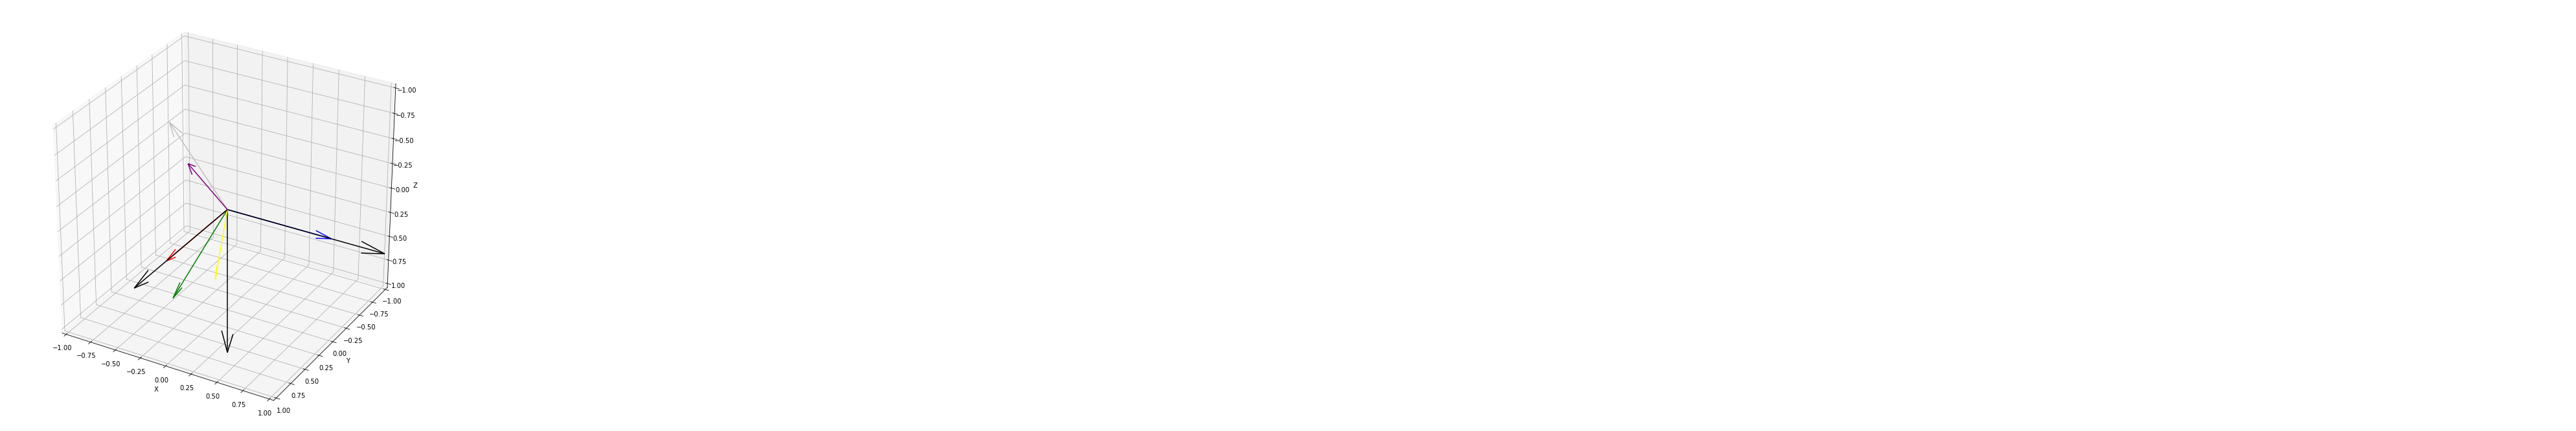

In [16]:
fig=plt.figure()
ax=fig.gca(projection='3d')
ax.quiver(0, 0, 0, 1.5, 0, 0, color='black', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, 0, 1.5, 0, color='black', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, 0, 0, 1.5, color='black', arrow_length_ratio=0.15)
# Original Vector (shown in blue)
ax.quiver(0, 0, 0, v[0], v[1], v[2], color='blue', arrow_length_ratio=0.15)
# Rotated Vectors (shown in red)
ax.quiver(0, 0, 0, rv1[0], rv1[1], rv1[2], color='red', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, rv2[0], rv2[1], rv2[2], color='purple', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, rv3[0], rv3[1], rv3[2], color='green', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, rv4[0], rv4[1], rv4[2], color='yellow', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, rv5[0], rv5[1], rv5[2], color='silver', arrow_length_ratio=0.15)

ax.set_xlim3d(-1, 1)
ax.set_ylim3d(1, -1)
ax.set_zlim3d(1, -1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [17]:
# unit vector along x-axis
v=np.array([5, 0, 0])
# TODO: calculate the new rotated versions of `v`.
rv=np.dot(R, v)
rv1=np.dot(R1, v)
rv2=np.dot(R2, v)
rv3=np.dot(R3, v)
rv4=np.dot(R4, v)
rv5=np.dot(R5, v)
print(v)
print(rv)
print(rv1)
print(rv2)
print(rv3)
print(rv4)
print(rv5)

[5 0 0]
[ 0.     1.294 -4.83 ]
[ 0.  5. -0.]
[ 0.     3.214 -3.83 ]
[0.    4.532 2.113]
[2.041 4.532 0.547]
[-2.041  1.294 -4.377]


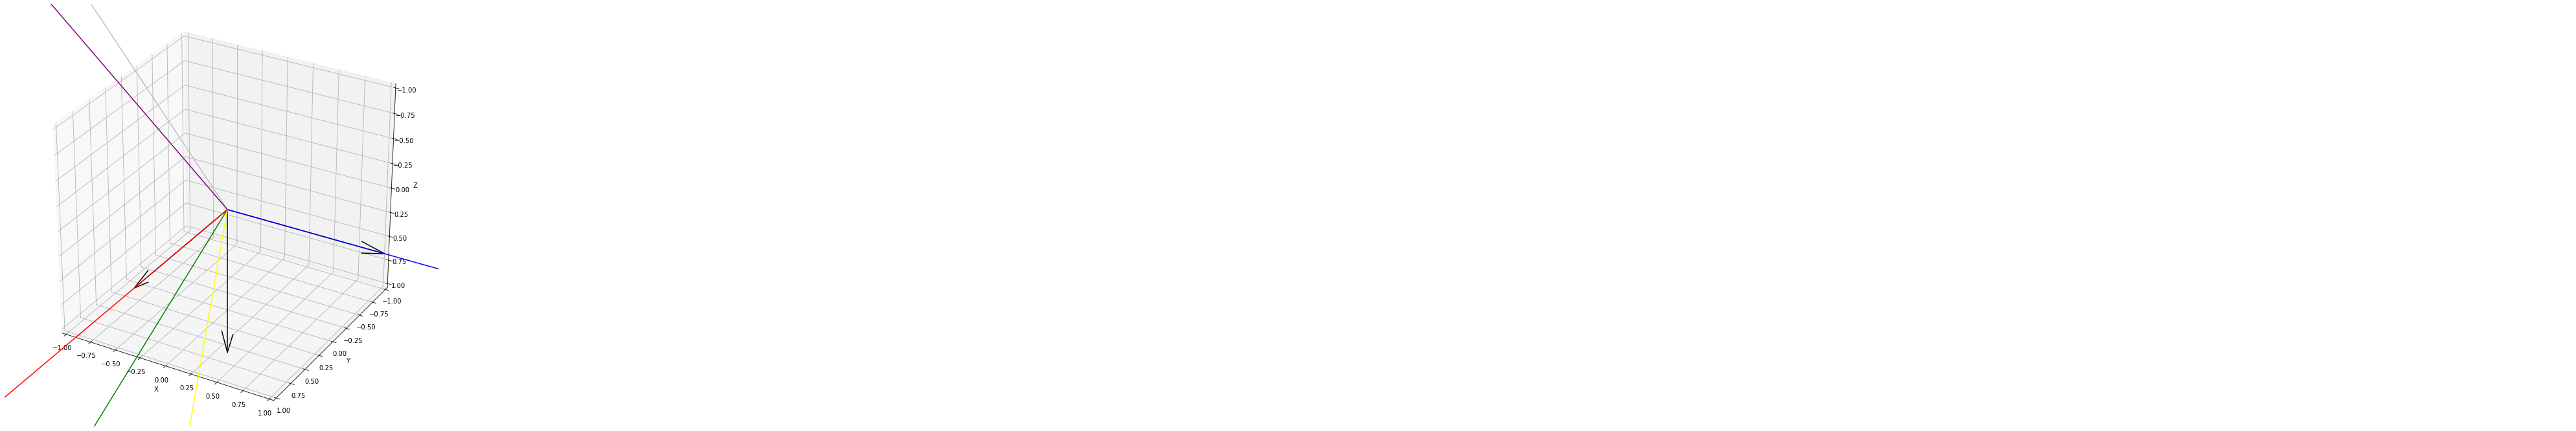

In [18]:
fig=plt.figure()
ax=fig.gca(projection='3d')
ax.quiver(0, 0, 0, 1.5, 0, 0, color='black', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, 0, 1.5, 0, color='black', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, 0, 0, 1.5, color='black', arrow_length_ratio=0.15)
# Original Vector (shown in blue)
ax.quiver(0, 0, 0, v[0], v[1], v[2], color='blue', arrow_length_ratio=0.15)
# Rotated Vectors (shown in red)
ax.quiver(0, 0, 0, rv1[0], rv1[1], rv1[2], color='red', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, rv2[0], rv2[1], rv2[2], color='purple', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, rv3[0], rv3[1], rv3[2], color='green', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, rv4[0], rv4[1], rv4[2], color='yellow', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, rv5[0], rv5[1], rv5[2], color='silver', arrow_length_ratio=0.15)

ax.set_xlim3d(-1, 1)
ax.set_ylim3d(1, -1)
ax.set_zlim3d(1, -1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [19]:
# unit vector along x-axis
v=np.array([1, 1, 0])
# TODO: calculate the new rotated versions of `v`.
rv=np.dot(R, v)
rv1=np.dot(R1, v)
rv2=np.dot(R2, v)
rv3=np.dot(R3, v)
rv4=np.dot(R4, v)
rv5=np.dot(R5, v)
print(v)
print(rv)
print(rv1)
print(rv2)
print(rv3)
print(rv4)
print(rv5)

[1 1 0]
[-0.906  0.667 -0.857]
[0.174 1.    0.985]
[-1.     0.643 -0.766]
[-0.259  0.498  1.298]
[0.149 0.906 1.075]
[-1.315  0.259 -0.453]


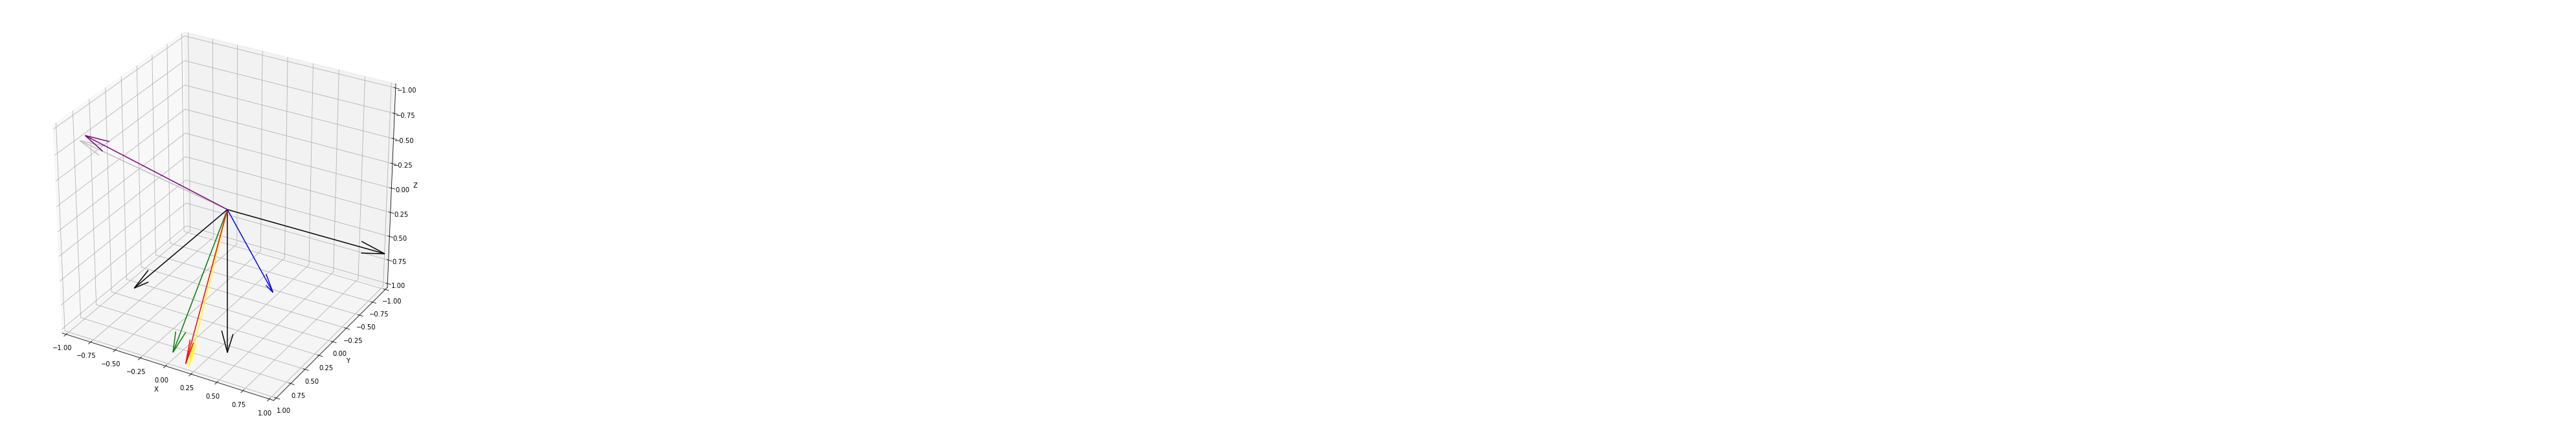

In [20]:
fig=plt.figure()
ax=fig.gca(projection='3d')
ax.quiver(0, 0, 0, 1.5, 0, 0, color='black', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, 0, 1.5, 0, color='black', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, 0, 0, 1.5, color='black', arrow_length_ratio=0.15)
# Original Vector (shown in blue)
ax.quiver(0, 0, 0, v[0], v[1], v[2], color='blue', arrow_length_ratio=0.15)
# Rotated Vectors (shown in red)
ax.quiver(0, 0, 0, rv1[0], rv1[1], rv1[2], color='red', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, rv2[0], rv2[1], rv2[2], color='purple', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, rv3[0], rv3[1], rv3[2], color='green', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, rv4[0], rv4[1], rv4[2], color='yellow', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, rv5[0], rv5[1], rv5[2], color='silver', arrow_length_ratio=0.15)

ax.set_xlim3d(-1, 1)
ax.set_ylim3d(1, -1)
ax.set_zlim3d(1, -1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [21]:
# unit vector along x-axis
v=np.array([1, 1, 1])
# TODO: calculate the new rotated versions of `v`.
rv=np.dot(R, v)
rv1=np.dot(R1, v)
rv2=np.dot(R2, v)
rv3=np.dot(R3, v)
rv4=np.dot(R4, v)
rv5=np.dot(R5, v)
print(v)
print(rv)
print(rv1)
print(rv2)
print(rv3)
print(rv4)
print(rv5)

[1 1 1]
[-0.484  1.542 -0.622]
[1.158 1.    0.811]
[-1.     1.409 -0.123]
[0.707 0.389 1.533]
[1.025 0.484 1.31 ]
[-1.205  1.225 -0.218]


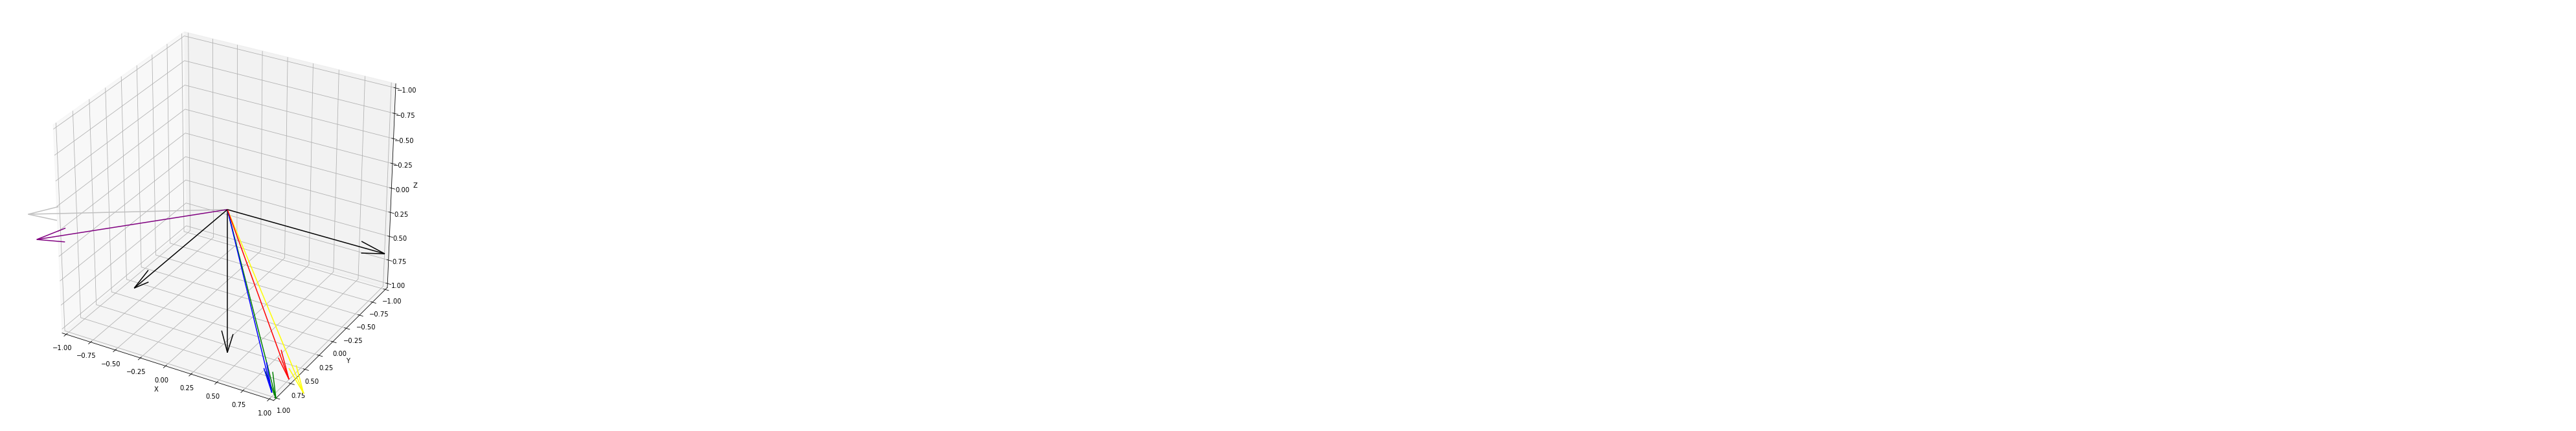

In [22]:
fig=plt.figure()
ax=fig.gca(projection='3d')
ax.quiver(0, 0, 0, 1.5, 0, 0, color='black', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, 0, 1.5, 0, color='black', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, 0, 0, 1.5, color='black', arrow_length_ratio=0.15)
# Original Vector (shown in blue)
ax.quiver(0, 0, 0, v[0], v[1], v[2], color='blue', arrow_length_ratio=0.15)
# Rotated Vectors (shown in red)
ax.quiver(0, 0, 0, rv1[0], rv1[1], rv1[2], color='red', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, rv2[0], rv2[1], rv2[2], color='purple', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, rv3[0], rv3[1], rv3[2], color='green', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, rv4[0], rv4[1], rv4[2], color='yellow', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, rv5[0], rv5[1], rv5[2], color='silver', arrow_length_ratio=0.15)

ax.set_xlim3d(-1, 1)
ax.set_ylim3d(1, -1)
ax.set_zlim3d(1, -1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [27]:
# unit vector along x-axis
v=np.array([0.75, 1.2, 1.5])
# TODO: calculate the new rotated versions of `v`.
rv=np.dot(R, v)
rv1=np.dot(R1, v)
rv2=np.dot(R2, v)
rv3=np.dot(R3, v)
rv4=np.dot(R4, v)
rv5=np.dot(R5, v)
print(v)
print(rv)
print(rv1)
print(rv2)
print(rv3)
print(rv4)
print(rv5)

[0.75 1.2  1.5 ]
[-0.454  1.997 -0.241]
[1.686 0.75  0.921]
[-1.2    1.631  0.39 ]
[1.138 0.026 1.719]
[1.309 0.046 1.593]
[-1.23   1.643  0.202]


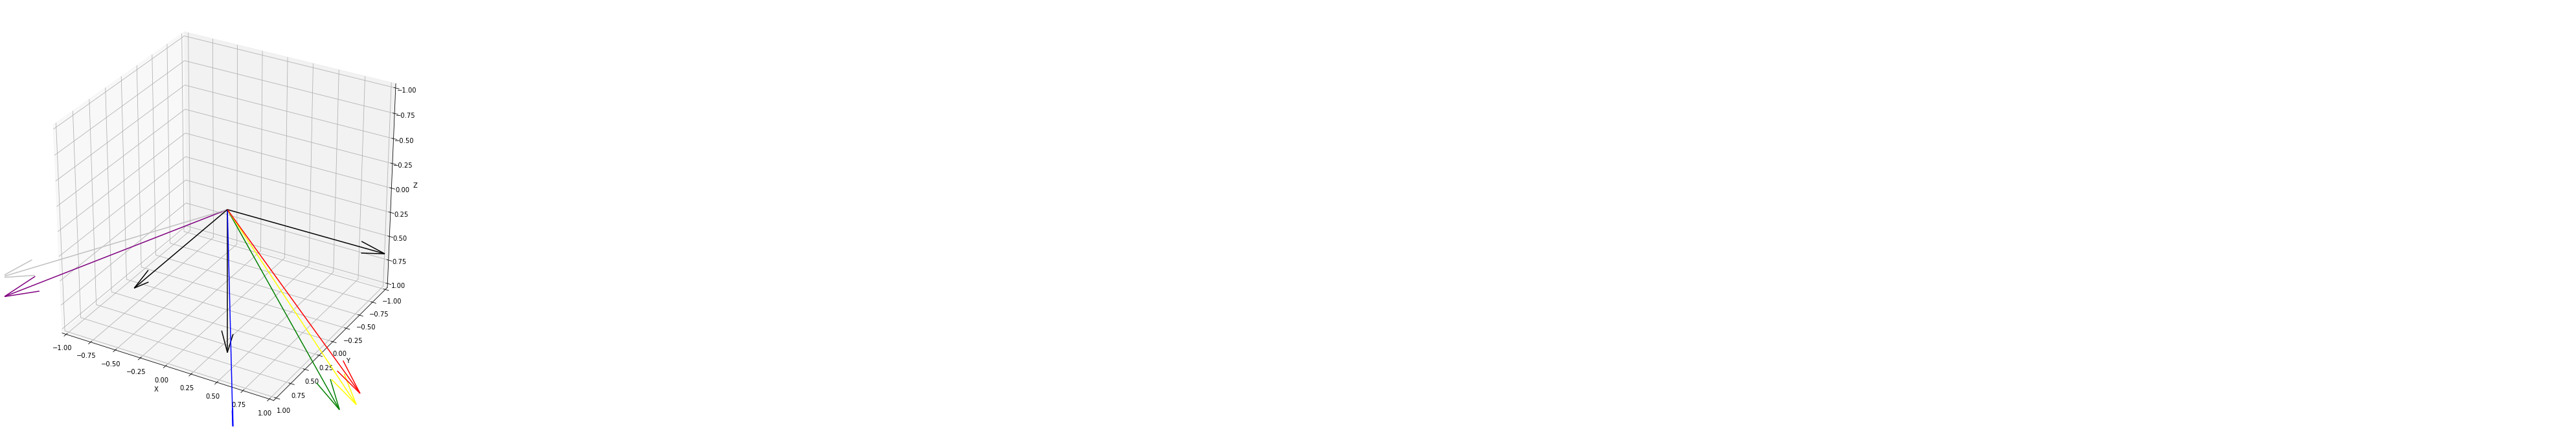

In [28]:
fig=plt.figure()
ax=fig.gca(projection='3d')
ax.quiver(0, 0, 0, 1.5, 0, 0, color='black', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, 0, 1.5, 0, color='black', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, 0, 0, 1.5, color='black', arrow_length_ratio=0.15)
# Original Vector (shown in blue)
ax.quiver(0, 0, 0, v[0], v[1], v[2], color='blue', arrow_length_ratio=0.15)
# Rotated Vectors (shown in red)
ax.quiver(0, 0, 0, rv1[0], rv1[1], rv1[2], color='red', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, rv2[0], rv2[1], rv2[2], color='purple', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, rv3[0], rv3[1], rv3[2], color='green', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, rv4[0], rv4[1], rv4[2], color='yellow', arrow_length_ratio=0.15)
ax.quiver(0, 0, 0, rv5[0], rv5[1], rv5[2], color='silver', arrow_length_ratio=0.15)

ax.set_xlim3d(-1, 1)
ax.set_ylim3d(1, -1)
ax.set_zlim3d(1, -1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

### Quaternions

In the following exercise you'll implement functions to convert between Euler angles and quaternion representations. It's useful to be able to easily navigate back and forth between these representations because of their relative strengths. Quaternions are better for calculations, while Euler angles are far more intuitive.

Some messages coming from your drone in simulation (or in the real world) will represent orientation data as a quaternion, while others use Euler angles. So it's a good idea to be able to seamlessly handle both. 

In [30]:
import numpy as np

In [31]:
def euler_to_quaternion(angles):
    roll=angles[0]
    pitch=angles[1]
    yaw=angles[2]
    
    # TODO: complete the conversion and return a numpy array of 4 elements representing a quaternion [a, b, c, d]
    sp=np.sin(pitch/2.0)
    cp=np.cos(pitch/2.0)
    sr=np.sin(roll/2.0)
    cr=np.cos(roll/2.0)
    sy=np.sin(yaw/2.0)
    cy=np.cos(yaw/2.0)
    a=cr*cp*cy+sr*sp*sy
    b=sr*cp*cy-cr*sp*sy
    c=cr*sp*cy+sr*cp*sy
    d=cr*cp*sy-sr*sp*cy
    return np.array([a, b, c, d])

In [32]:
def quaternion_to_euler(quaternion):
    a=quaternion[0]
    b=quaternion[1]
    c=quaternion[2]
    d=quaternion[3]
    
    # TODO: complete the conversion and return a numpy array of 3 element representing the euler angles [roll, pitch, yaw]
    roll=np.arctan2(2.0*(a*b+c*d), 1.0-2.0*(b**2+c**2))
    pitch=np.arcsin(2.0*(a*c-d*b))
    yaw=np.arctan2(2.0*(a*d+b*c), 1.0-2.0*(c**2+d**2))
    return np.array([roll, pitch, yaw])
    
    

In [37]:
euler=np.array([np.deg2rad(90), np.deg2rad(30), np.deg2rad(0)])
print(euler)

[1.571 0.524 0.   ]


In [38]:
q=euler_to_quaternion(euler)
print(q)

[ 0.683  0.683  0.183 -0.183]


In [39]:
e=quaternion_to_euler(q)
print(e)

[1.571 0.524 0.   ]


In [41]:
euler=np.array([np.deg2rad(90), np.deg2rad(90), np.deg2rad(90)])
print(euler)

[1.571 1.571 1.571]


In [42]:
q=euler_to_quaternion(euler)
print(q)

[0.707 0.    0.707 0.   ]


In [40]:
assert np.allclose(euler, quaternion_to_euler(q))

#### Confguration Space

In this notebook you'll create a configuration space given a map of the world and setting a particular altitude for your drone. You'll read in a `.csv` file containing obstacle data which consists of six columns $x$, $y$, $z$ and $\delta x$, $\delta y$, $\delta z$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"]=[12,12]
filename='colliders.csv'
data=np.loadtxt(filename, delimiter=',', dtype='Float64', skiprows=2)
print(data)

[[-310.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-300.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-290.2389   -439.2315     85.5         5.          5.         85.5     ]
 ...
 [ 257.8061    425.1645      1.75852     1.292725    1.292725    1.944791]
 [ 293.9967    368.3391      3.557666    1.129456    1.129456    3.667319]
 [ 281.5162    354.4156      4.999351    1.053772    1.053772    4.950246]]


In [6]:
drone_altitude=10
safe_distance=5

In [13]:
def create_grid(data, drone_altitude, safety_distance):
    """
    Returns a grid representation of a 2D configuration space
    based on given obstacle data, drone altitude and safety distance
    arguments.
    """

    # minimum and maximum north coordinates
    north_min = np.floor(np.min(data[:, 0] - data[:, 3]))
    north_max = np.ceil(np.max(data[:, 0] + data[:, 3]))
    
    # minimum and maximum east coordinates
    east_min = np.floor(np.min(data[:, 1] - data[:, 4]))
    east_max = np.ceil(np.max(data[:, 1] + data[:, 4]))
    
    # given the minimum and maximum coordinates we can
    # calculate the size of the grid.
    north_size = int(np.ceil(north_max - north_min))
    east_size = int(np.ceil(east_max - east_min))
    
    # Initialize an empty grid
    grid = np.zeros((north_size, east_size))
    
    # Center offset for grid
    north_min_center = np.min(data[:, 0])
    east_min_center = np.min(data[:, 0])
    
    # Populate the grid with obstacles
    for i in range(data.shape[0]):
        
        north, east, alt, d_north, d_east, d_alt = data[i, :]
        if alt + d_alt + safety_distance > drone_altitude:
            obstacle = [
                int(np.clip(north - d_north - safety_distance - north_min, 0, north_size-1)),
                int(np.clip(north + d_north + safety_distance - north_min, 0, north_size-1)),
                int(np.clip(east - d_east - safety_distance - east_min, 0, east_size-1)),
                int(np.clip(east + d_east + safety_distance - east_min, 0, east_size-1)),
            ]
            grid[obstacle[0]:obstacle[1]+1, obstacle[2]:obstacle[3]+1]=1
        
    return grid

In [14]:
grid=create_grid(data, drone_altitude, safe_distance)

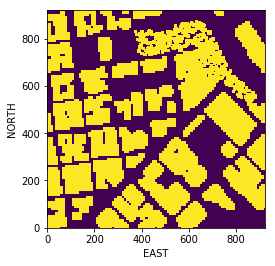

In [15]:
plt.imshow(grid, origin='lower')
plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

Play around with the `drone_altitude` and `safe_distance` values to get a feel for how it changes the map.

In [16]:
plt.rcParams["figure.figsize"]=[12,12]
drone_altitude=100
safe_distance=5

In [17]:
def create_grid(data, drone_altitude, safety_distance):
    """
    Returns a grid representation of a 2D configuration space
    based on given obstacle data, drone altitude and safety distance
    arguments.
    """

    # minimum and maximum north coordinates
    north_min = np.floor(np.min(data[:, 0] - data[:, 3]))
    north_max = np.ceil(np.max(data[:, 0] + data[:, 3]))

    # minimum and maximum east coordinates
    east_min = np.floor(np.min(data[:, 1] - data[:, 4]))
    east_max = np.ceil(np.max(data[:, 1] + data[:, 4]))

    # given the minimum and maximum coordinates we can
    # calculate the size of the grid.
    north_size = int(np.ceil(north_max - north_min))
    east_size = int(np.ceil(east_max - east_min))

    # Initialize an empty grid
    grid = np.zeros((north_size, east_size))
    
    # Center offset for grid
    north_min_center = np.min(data[:, 0])
    east_min_center = np.min(data[:, 1])

    # Populate the grid with obstacles
    for i in range(data.shape[0]):
        north, east, alt, d_north, d_east, d_alt = data[i, :]
        if alt + d_alt + safety_distance > drone_altitude:
            obstacle = [
                int(np.clip(north - d_north - safety_distance - north_min, 0, north_size-1)),
                int(np.clip(north + d_north + safety_distance - north_min, 0, north_size-1)),
                int(np.clip(east - d_east - safety_distance - east_min, 0, east_size-1)),
                int(np.clip(east + d_east + safety_distance - east_min, 0, east_size-1)),
            ]
            grid[obstacle[0]:obstacle[1]+1, obstacle[2]:obstacle[3]+1] = 1

    return grid

In [18]:
grid=create_grid(data, drone_altitude, safe_distance)

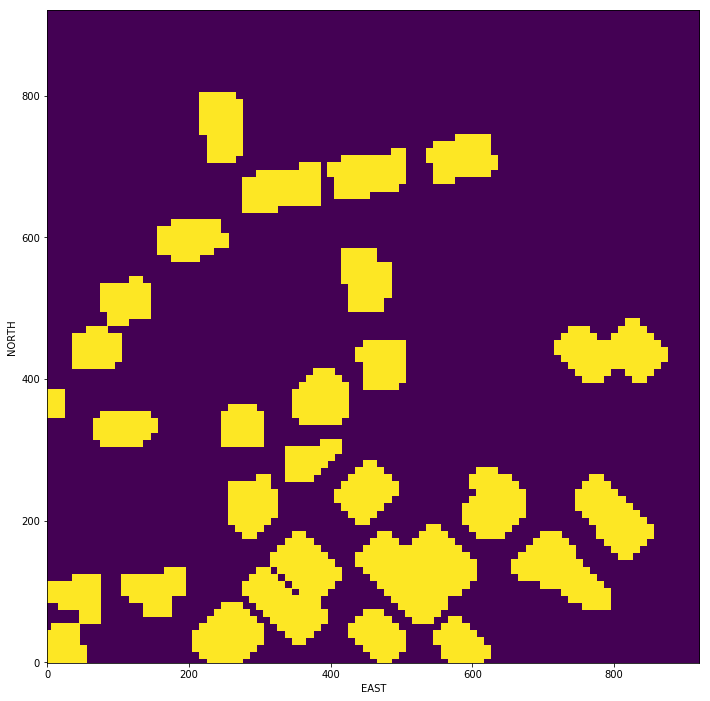

In [19]:
plt.imshow(grid, origin='lower')
plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

In [23]:
plt.rcParams["figure.figsize"]=[10,10]
drone_altitude=25
safe_distance=10

In [24]:
def create_grid(data, drone_altitude, safety_distance):
    """
    Returns a grid representation of a 2D configuration space
    based on given obstacle data, drone altitude and safety distance
    arguments.
    """

    # minimum and maximum north coordinates
    north_min = np.floor(np.min(data[:, 0] - data[:, 3]))
    north_max = np.ceil(np.max(data[:, 0] + data[:, 3]))

    # minimum and maximum east coordinates
    east_min = np.floor(np.min(data[:, 1] - data[:, 4]))
    east_max = np.ceil(np.max(data[:, 1] + data[:, 4]))

    # given the minimum and maximum coordinates we can
    # calculate the size of the grid.
    north_size = int(np.ceil(north_max - north_min))
    east_size = int(np.ceil(east_max - east_min))

    # Initialize an empty grid
    grid = np.zeros((north_size, east_size))
    
    # Center offset for grid
    north_min_center = np.min(data[:, 0])
    east_min_center = np.min(data[:, 1])

    # Populate the grid with obstacles
    for i in range(data.shape[0]):
        north, east, alt, d_north, d_east, d_alt = data[i, :]
        if alt + d_alt + safety_distance > drone_altitude:
            obstacle = [
                int(np.clip(north - d_north - safety_distance - north_min, 0, north_size-1)),
                int(np.clip(north + d_north + safety_distance - north_min, 0, north_size-1)),
                int(np.clip(east - d_east - safety_distance - east_min, 0, east_size-1)),
                int(np.clip(east + d_east + safety_distance - east_min, 0, east_size-1)),
            ]
            grid[obstacle[0]:obstacle[1]+1, obstacle[2]:obstacle[3]+1] = 1

    return grid

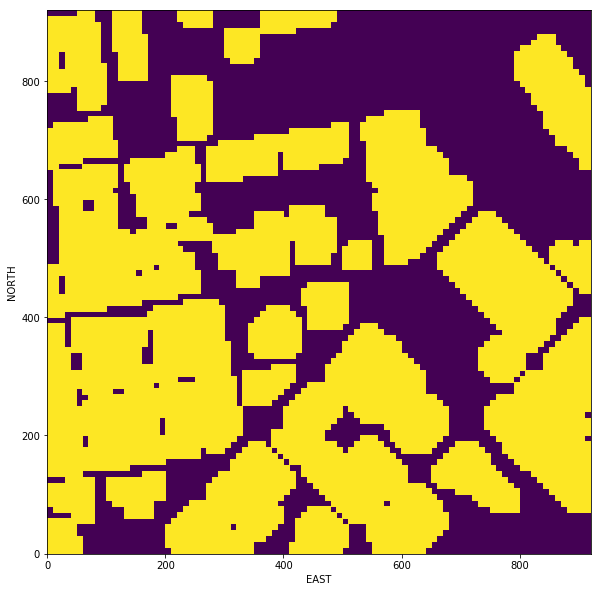

In [25]:
grid=create_grid(data, drone_altitude, safe_distance)
plt.imshow(grid, origin='lower')
plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

In [35]:
plt.rcParams["figure.figsize"]=[10,10]
drone_altitude=15
safe_distance=2

In [36]:
def create_grid(data, drone_altitude, safety_distance):
    """
    Returns a grid representation of a 2D configuration space
    based on given obstacle data, drone altitude and safety distance
    arguments.
    """

    # minimum and maximum north coordinates
    north_min = np.floor(np.min(data[:, 0] - data[:, 3]))
    north_max = np.ceil(np.max(data[:, 0] + data[:, 3]))

    # minimum and maximum east coordinates
    east_min = np.floor(np.min(data[:, 1] - data[:, 4]))
    east_max = np.ceil(np.max(data[:, 1] + data[:, 4]))

    # given the minimum and maximum coordinates we can
    # calculate the size of the grid.
    north_size = int(np.ceil(north_max - north_min))
    east_size = int(np.ceil(east_max - east_min))

    # Initialize an empty grid
    grid = np.zeros((north_size, east_size))
    
    # Center offset for grid
    north_min_center = np.min(data[:, 0])
    east_min_center = np.min(data[:, 1])

    # Populate the grid with obstacles
    for i in range(data.shape[0]):
        north, east, alt, d_north, d_east, d_alt = data[i, :]
        if alt + d_alt + safety_distance > drone_altitude:
            obstacle = [
                int(np.clip(north - d_north - safety_distance - north_min, 0, north_size-1)),
                int(np.clip(north + d_north + safety_distance - north_min, 0, north_size-1)),
                int(np.clip(east - d_east - safety_distance - east_min, 0, east_size-1)),
                int(np.clip(east + d_east + safety_distance - east_min, 0, east_size-1)),
            ]
            grid[obstacle[0]:obstacle[1]+1, obstacle[2]:obstacle[3]+1] = 1

    return grid

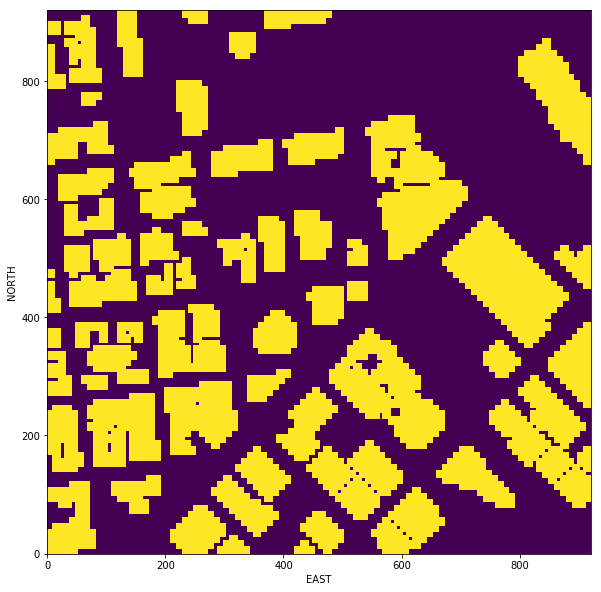

In [37]:
grid=create_grid(data, drone_altitude, safe_distance)
plt.imshow(grid, origin='lower')
plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()